In [62]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from kmeans_pytorch import kmeans, kmeans_predict

In [63]:
!pip install kmeans-pytorch

In [64]:
np.random.seed(42)

In [65]:
data_size, dims, num_clusters = 1000, 2, 3
x = np.random.randn(data_size, dims) / 6
x = torch.from_numpy(x)

In [66]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
device

device(type='cuda')

In [67]:
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=num_clusters, distance='euclidean', device=device
)

running k-means on cuda..


[running kmeans]: 5it [00:00, 248.62it/s, center_shift=0.000047, iteration=5, tol=0.000100]


In [68]:
print(cluster_ids_x)
print(cluster_centers)

tensor([1, 0, 2, 0, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 2, 2, 0,
        1, 1, 2, 0, 2, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 1,
        0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0, 1, 1, 0, 2, 1, 2, 2, 0, 2, 1, 0, 2,
        0, 2, 0, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0,
        1, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2,
        2, 0, 2, 2, 0, 2, 0, 2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0,
        1, 2, 2, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1,
        2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 2, 2,
        2, 0, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2,
        0, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 0,
        1, 2, 2, 2, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2,
        1, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 2, 2, 0, 1, 1,
        0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1,

In [69]:
y = np.random.randn(5, dims) / 6
y = torch.from_numpy(y)

In [70]:
cluster_ids_y = kmeans_predict(
    y, cluster_centers, 'euclidean', device=device
)

predicting on cuda..


In [71]:
print(cluster_ids_y)

tensor([1, 0, 1, 2, 0])


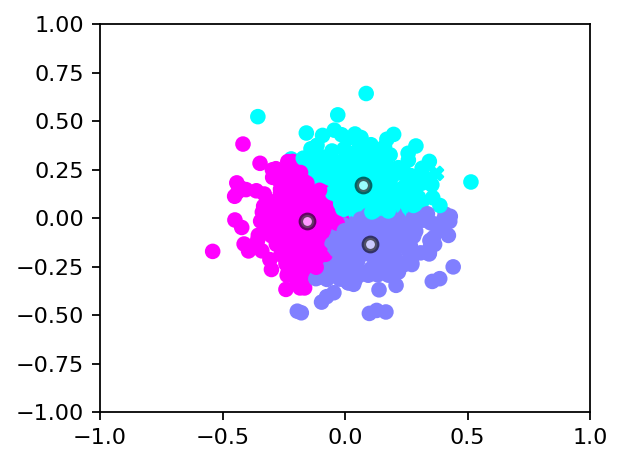

In [72]:
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(x[:, 0], x[:, 1], c=cluster_ids_x, cmap='cool')
plt.scatter(y[:, 0], y[:, 1], c=cluster_ids_y, cmap='cool', marker='X')
plt.scatter(
    cluster_centers[:, 0], cluster_centers[:, 1],
    c='white',
    alpha=0.6,
    edgecolors='black',
    linewidths=2
)
plt.axis([-1, 1, -1, 1])
plt.tight_layout()
plt.show()

## Task 1: Applying K-Means Clustering
### Goal:
Familiarize yourself with the basic K-Means clustering algorithm.
### Task:
- Generate a dataset consisting of 300 samples, 4 features, and 3 clusters using the make_blobs function from scikit-learn.
- Use the KMeans class to perform clustering on the generated data.
- Calculate the inertia of the model and plot a graph to visualize the clustering result.
- Determine the optimal number of clusters using the elbow method, testing the range from 1 to 10 clusters.


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Generate a dataset with 300 samples, 4 features, and 3 clusters
data, labels = make_blobs(n_samples=300, n_features=4, centers=3, random_state=33)

# Create an array from the generated data
X = np.array(data)

# Initialize an empty list to store the inertia values
inertia = []

# Perform K-Means clustering for a range of cluster counts from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

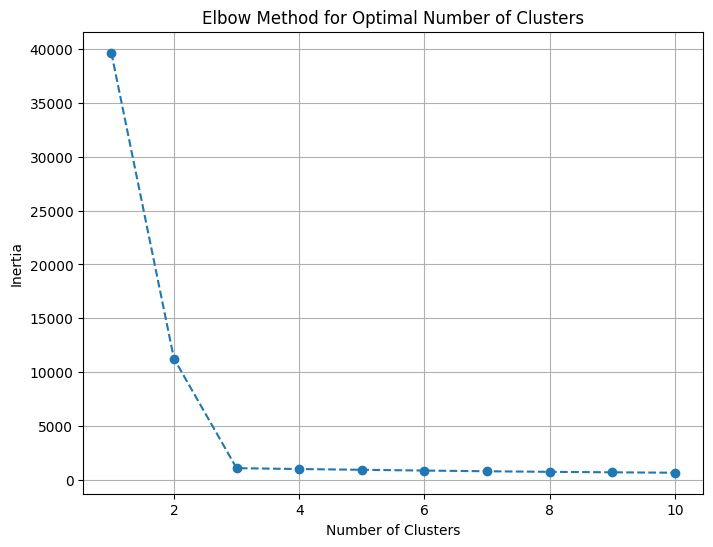

In [74]:

# Plot the inertia values to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

## Task 2: Hierarchical Clustering
### Goal:
Understand agglomerative hierarchical clustering.
### Task:
- Generate a dataset from the previous task.
- Apply agglomerative hierarchical clustering using the AgglomerativeClustering class.
- Plot a dendrogram for hierarchical clustering to illustrate how points are merged into clusters.
- Compare the results with K-Means clustering.

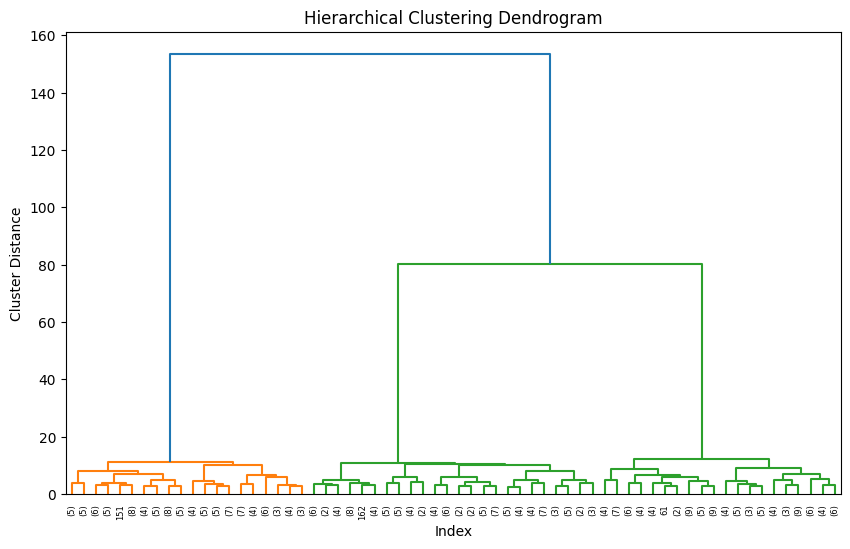

In [75]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generate a dataset with 300 samples, 4 features, and 3 clusters
data, labels = make_blobs(n_samples=300, n_features=4, centers=3, random_state=0)

# Create an array from the generated data
X = np.array(data)

# Hierarchical Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3) 
agg_labels = agg_clustering.fit_predict(X)

# Create a dendrogram with truncated labels to visualize hierarchical clustering
plt.figure(figsize=(10, 6))
linked = linkage(X, method='ward')
dendrogram(linked, orientation='top', truncate_mode='lastp', p=64)  # Truncate labels to display only the last 12
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Cluster Distance')
plt.show()

## Task 3: DBSCAN Clustering
Aim: Understanding density-based clustering using DBSCAN.

Task:
- Generate a dataset with features forming dense regions using make_moons from scikit-learn.
- Apply the DBSCAN algorithm to this dataset.
- Adjust the parameters eps and min_samples to obtain meaningful clustering results.
- Visualize the results and compare them with the results of K-means on the same data.

In [ ]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# Generate a dataset with dense regions using make_moons
data, labels = make_moons(n_samples=300, noise=0.05, random_state=33)

# Create an array from the generated data
X = np.array(data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# K-Means clustering for comparison
kmeans = KMeans(n_clusters=2, random_state=33)
kmeans_labels = kmeans.fit_predict(X)

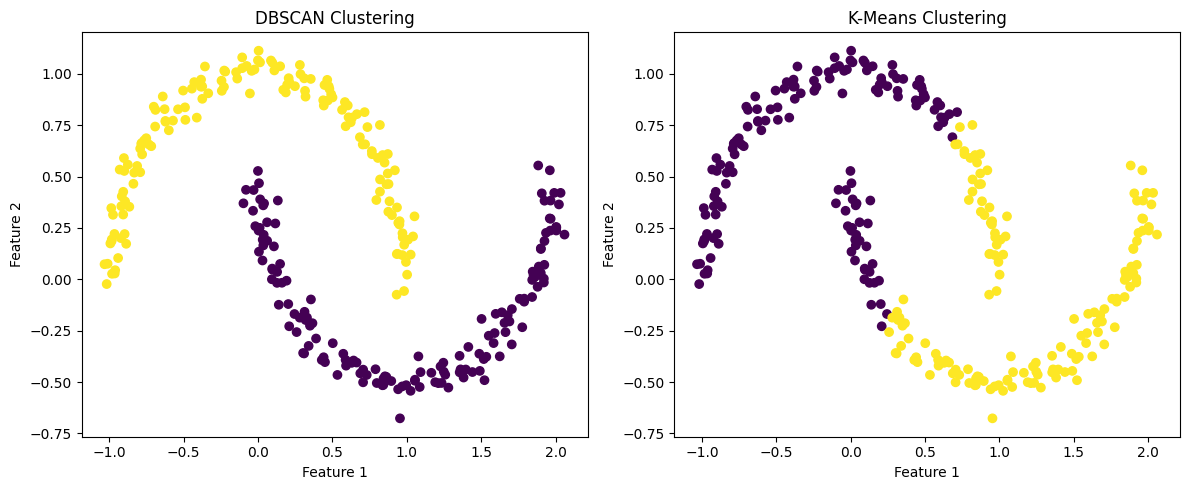

In [77]:
# Visualize the DBSCAN clustering results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()